In [2]:
using Pkg
# Pkg.add("QuadGK")
using QuadGK
using Polynomials
using Plots

In [3]:
(xp, a) = gauss(Float64,7);
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

## Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

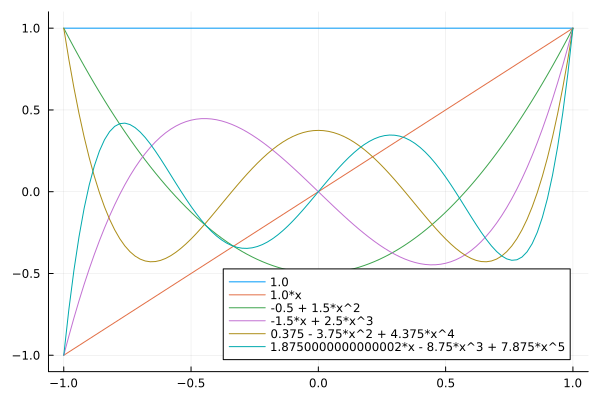

In [16]:
functions = Vector{Polynomial{Float64}}()

p0 = Polynomial([1.0])
p1 = Polynomial([0.0, 1.0])
functions = [p0, p1]
for i in 2:5
    p = (2*i-1)/(i)*p1*functions[i] - (i-1)/(i)*functions[i-1]
    push!(functions, p)
end

xs = -1:1
plot()
for f in functions
    plot!(f, extrema(xs)...)
end
plot!(ylim = (-1.1,1.1))


In [23]:
for i in 3:6
    println(roots(functions[i]))
    (xp, a) = gauss(Float64,i-1);
    println(xp, "\n")
end

[-0.5773502691896258, 0.5773502691896256]
[-0.5773502691896258, 0.5773502691896258]

[-0.7745966692414834, 0.7745966692414835, 0.0]
[-0.7745966692414834, 0.0, 0.7745966692414834]

[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]

[-0.9061798459386644, -0.5384693101056828, 0.5384693101056831, 0.906179845938664, 0.0]
[-0.906179845938664, -0.5384693101056831, 0.0, 0.5384693101056831, 0.906179845938664]



Odcięte $x_{i}$ n-punktowej kwadratury Gaussa z funkcją ważącą w są zerami wielomianu ortogonalnego dla tego samego przedziału i tej samej funkcji ważące

### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [41]:
function testGauss(k,f)
    (xp, a) = gauss(Float64,k);
    sum(a .* f.(xp))
end;

In [44]:
test = [[if j != i  0 else i end for i in 1:j] for j in 1:15]


15-element Vector{Vector{Int64}}:
 [1]
 [0, 2]
 [0, 0, 3]
 [0, 0, 0, 4]
 [0, 0, 0, 0, 5]
 [0, 0, 0, 0, 0, 6]
 [0, 0, 0, 0, 0, 0, 7]
 [0, 0, 0, 0, 0, 0, 0, 8]
 [0, 0, 0, 0, 0, 0, 0, 0, 9]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 10]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15]

In [46]:
for i in 1:15
    poly = Polynomial(test[i])
    println("Polynomial level: $i, Calc: $(testGauss(4, poly))  Expected: $(1^length(poly) - ((-1)^length(poly)))")
end

Polynomial level: 1, Calc: 2.0  Expected: 2
Polynomial level: 2, Calc: -1.1102230246251565e-16  Expected: 0
Polynomial level: 3, Calc: 2.0000000000000004  Expected: 2
Polynomial level: 4, Calc: 0.0  Expected: 0
Polynomial level: 5, Calc: 2.000000000000001  Expected: 2
Polynomial level: 6, Calc: 0.0  Expected: 0
Polynomial level: 7, Calc: 2.000000000000001  Expected: 2
Polynomial level: 8, Calc: 0.0  Expected: 0
Polynomial level: 9, Calc: 1.8955102040816336  Expected: 2
Polynomial level: 10, Calc: 0.0  Expected: 0
Polynomial level: 11, Calc: 1.7163848396501462  Expected: 2
Polynomial level: 12, Calc: 0.0  Expected: 0
Polynomial level: 13, Calc: 1.5039933361099547  Expected: 2
Polynomial level: 14, Calc: 0.0  Expected: 0
Polynomial level: 15, Calc: 1.286849526982805  Expected: 2


Funkcja przestaje być dokładna przy stopniu wielomianu równym 9. Wynika to z twierdzenia o stopniu dokładności kwadratury Gaussa - jest ona dokładna dla wielomianu o stopniu równym maksymalnie $2n -1$, zatem dla kwadratury równej 4 dokładność kończy się na wielomianie stopnia 9.

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [77]:
function gaussFullTest(k,f,a,b)
    (roots,coeffs) = gauss(k)
    roots = (b-a)/2 .* roots .+ (b+a)/2
    value = (b-a)/2 .* sum(coeffs.*f.(roots))
    return value
end

gaussFullTest (generic function with 1 method)

In [84]:
test1 = Polynomial([0,2,1])

Polynomial(2*x + x^2)

In [86]:
test1 = Polynomial([0,2,1])
calc(x) = x^3/3 + x^2
a = 0
b = 4
for i in 1:5
    println("Quadrade: $i, Interval: [0,4] Expected: $(calc(b)- calc(a)) Got: $(gaussFullTest(i,test1,a,b))")
end

Quadrade: 1, Interval: [0,4] Expected: 37.33333333333333 Got: 32.0
Quadrade: 2, Interval: [0,4] Expected: 37.33333333333333 Got: 37.33333333333333
Quadrade: 3, Interval: [0,4] Expected: 37.33333333333333 Got: 37.33333333333333
Quadrade: 4, Interval: [0,4] Expected: 37.33333333333333 Got: 37.333333333333336
Quadrade: 5, Interval: [0,4] Expected: 37.33333333333333 Got: 37.33333333333332


In [97]:
test2(x) = sin(x) + cos(x)
calc(x) = -cos(x) + sin(x)
a = 0
b = 7
for i in 1:6
    println("Quadrade: $i, Interval: [0,4] Expected: $(calc(b)- calc(a)) Got: $(gaussFullTest(i,test2,a,b))")
end

Quadrade: 1, Interval: [0,4] Expected: 0.9030843443754845 Got: -9.010679404862913
Quadrade: 2, Interval: [0,4] Expected: 0.9030843443754845 Got: 3.9187638947631154
Quadrade: 3, Interval: [0,4] Expected: 0.9030843443754845 Got: 0.5444222534008676
Quadrade: 4, Interval: [0,4] Expected: 0.9030843443754845 Got: 0.9245839988764366
Quadrade: 5, Interval: [0,4] Expected: 0.9030843443754845 Got: 0.9023066755774547
Quadrade: 6, Interval: [0,4] Expected: 0.9030843443754845 Got: 0.9031031889296576


In [99]:
test3 = exp
calc(x) = exp(x)
a = 0
b = 12
for i in 1:5
    println("Quadrade: $i, Interval: [0,4] Expected: $(calc(b)- calc(a)) Got: $(gaussFullTest(i,test3,a,b))")
end

Quadrade: 1, Interval: [0,4] Expected: 162753.79141900392 Got: 4841.145521912821
Quadrade: 2, Interval: [0,4] Expected: 162753.79141900392 Got: 77407.60916762098
Quadrade: 3, Interval: [0,4] Expected: 162753.79141900392 Got: 142466.55136787545
Quadrade: 4, Interval: [0,4] Expected: 162753.79141900392 Got: 159999.928582762
Quadrade: 5, Interval: [0,4] Expected: 162753.79141900392 Got: 162509.96213554274
